# Momento evaluativo 3 - Data Processing

### Genaro Alfonso Aristizabal Echeverri
### Euler Leonardo Cuaran Rosero

## 1. Librerias y configuraciones previas

In [2]:
# carque de librerias
import pandas as pd                     # Para manipulación y análisis de datos
import numpy as np                      # Para cálculo numérico y manejo de arreglos multidimensionales.
import unidecode                        # Para eliminar acentos y caracteres especiales de cadenas de texto.
import re                               # Para trabajar con expresiones regulares y manipular texto.
import pyarrow                          # Para interoperabilidad de datos y manejo de datos en formato Apache Arrow.
import matplotlib.pyplot as plt         # Para crear gráficos y visualizaciones.
import seaborn as sns                   # Para crear visualizaciones estadísticas de manera más sencilla y atractiva.
from sklearn.cluster import DBSCAN      # Para aplicar el algoritmo de agrupamiento DBSCAN basado en densidad.

## Lectura y cargue de la base de datos

La base de datos fue extraída del registro histórico de los beneficiarios del fondo línea pregrado de Sapiencia desde el semestre 2014-1 hasta el semestre 2024-2.

In [3]:
# Cargar un DataFrame desde un archivo Parquet
df = pd.read_parquet("Base_seminario_2.parquet")

# Imprimir las dimensiones del DataFrame (número de filas y columnas)
print("Dimensión de la base:", df.shape)

# Mostrar las primeras 5 filas del DataFrame
df.head()

Dimensión de la base: (468626, 46)


,id,id_usuario,idfiducia,numero_contrato_difuciario,idfiducia_giro,numero_contrato_giro,operador_logistico,id_fondo,identificacionfondo,comunagiros,...,FONDO SAPIENCIA,GENERO,FECHA DE NACIMIENTO,ESTRATO,COMUNA DE RESIDENCIA,PUNTAJE SISBEN,IES,PROGRAMA,DURACION DEL PROGRAMA,TOTAL CREDITOS DE LA CARRERA
0,10079172012-1EPM,1007917,16,4600009450,16.0,4600009450,SAPIENCIA,2,2,100234,...,EPM,MUJER,1990-01-20,Estrato 2,PENDIENTE,57-99,UNIVERSIDAD DE ANTIOQUIA,GERENCIA DE SISTEMAS DE INFORMACION EN SALUD,Pendiente,pendiente
9,10079172012-1EPM,1007917,16,4600009450,16.0,4600009450,SAPIENCIA,2,2,100234,...,EPM,MUJER,1990-01-20,Estrato 2,PENDIENTE,57-99,UNIVERSIDAD DE ANTIOQUIA,GERENCIA DE SISTEMAS DE INFORMACION EN SALUD,Pendiente,pendiente
18,10079172012-1EPM,1007917,16,4600009450,16.0,4600009450,SAPIENCIA,2,2,100234,...,EPM,MUJER,1990-01-20,Estrato 2,PENDIENTE,57-99,UNIVERSIDAD DE ANTIOQUIA,GERENCIA DE SISTEMAS DE INFORMACION EN SALUD,Pendiente,pendiente
27,10079172012-1EPM,1007917,16,4600009450,16.0,4600009450,SAPIENCIA,2,2,100234,...,EPM,MUJER,1990-01-20,Estrato 2,PENDIENTE,57-99,UNIVERSIDAD DE ANTIOQUIA,GERENCIA DE SISTEMAS DE INFORMACION EN SALUD,Pendiente,pendiente
36,10079172012-1EPM,1007917,16,4600009450,16.0,4600009450,SAPIENCIA,2,2,100234,...,EPM,MUJER,1990-01-20,Estrato 2,PENDIENTE,57-99,UNIVERSIDAD DE ANTIOQUIA,GERENCIA DE SISTEMAS DE INFORMACION EN SALUD,Pendiente,pendiente


## Analisis de la información del dataset

In [4]:
# Mostrar información resumida sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468626 entries, 0 to 4706287
Data columns (total 46 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   id                                468626 non-null  object        
 1   id_usuario                        468626 non-null  int64         
 2   idfiducia                         468626 non-null  object        
 3   numero_contrato_difuciario        468626 non-null  object        
 4   idfiducia_giro                    389538 non-null  object        
 5   numero_contrato_giro              389538 non-null  object        
 6   operador_logistico                468626 non-null  object        
 7   id_fondo                          468626 non-null  object        
 8   identificacionfondo               468626 non-null  object        
 9   comunagiros                       468626 non-null  object        
 10  observacion                    

Se puede observar que la gran mayoria de variables son de tipo objeto, lo cual, para nuestro caso requirió de un analisis posterior. 

## Identificación de valores duplicados

In [5]:
num_duplicados = df.duplicated().sum()

print(f'Número de filas duplicadas: {num_duplicados}')


Número de filas duplicadas: 0


Se pudo indentificar que el Dataset no cuenta con datos duplicados, esto debido al tratamiento previo que se realizo en la extracción de los registros de la Base de datos de Sapiencia

### Identificamos las variables y el numero de registros que tienen:

In [6]:
# Crear un DataFrame con los nombres de las columnas y la cantidad de valores no nulos
column_info = pd.DataFrame({
    'Nombre de la Columna': df.columns,
    'Cantidad de Valores': df.notnull().sum().values
})

# Mostrar la tabla con la información sobre los valores no nulos
column_info

,Nombre de la Columna,Cantidad de Valores
0,id,468626
1,id_usuario,468626
2,idfiducia,468626
3,numero_contrato_difuciario,468626
4,idfiducia_giro,389538
5,numero_contrato_giro,389538
6,operador_logistico,468626
7,id_fondo,468626
8,identificacionfondo,468626
9,comunagiros,468626


Analizando las variables contenidas en _dataset_ original, se evidencian columnas que no serán utilizadas para el propósito de este proyecto, por la cual serán eliminadas. 

## Eliminación de variables que no serán utilizadas

In [7]:
df = df.drop(columns= [
    'idfiducia', 
    'numero_contrato_difuciario', 
    'identificacionfondo', 
    'comunagiros', 
    'fecharegistro', 
    'numero_contrato_giro', 
    'diferencia_proyectado_renovacion', 
    'id_usuariosgiros', 
    'FECHA DE NACIMIENTO',
    "observacion",
    "TOTAL CREDITOS DE LA CARRERA",
    "PUNTAJE SISBEN",
    "DURACION DEL PROGRAMA",
    "idfiducia_giro",
    "giro_matricula",
    "giro_sostenimento",
    "diferencia_proyectado_giro"
])

In [8]:
df.shape

(468626, 29)

Eliminamos un total de 17 variables, teniendo como resultado un total de 468622 reguistros pertenecientras a las 29 columnas que se indican a continuación

In [9]:
df.columns.tolist()

['id',
 'id_usuario',
 'operador_logistico',
 'id_fondo',
 'numero_semestre_proyectado',
 'periodo_calculado_proeyctado',
 'tipo_modalidad',
 'total_semestres',
 'valor_proeyctado_matricula',
 'valor_proeyctado_sosteneimiento',
 'total_proyectado',
 'id_renovacionusuario',
 'numero_semestre_renovado',
 'periodo_calculado',
 'valor_renovado_matricula',
 'valor_renovado_sostenimiento',
 'total_renovacion',
 'valor_girado_matricula',
 'valor_girado_sostenimiento',
 'total_girado',
 'estado_credito',
 'id_estado_credito',
 'CONVOCATORIA',
 'FONDO SAPIENCIA',
 'GENERO',
 'ESTRATO',
 'COMUNA DE RESIDENCIA',
 'IES',
 'PROGRAMA']

## Verificamos la existencia de valores nulos en el Dataset

Se observa como la cantidad de registros en la base _df_ es de 468626 y todas las variables no cuentan con la misma cantidad de registros lo cual puede ser un indicador de la presencia de valores nulos.

In [10]:
# Contar y ordenar los nulos en orden descendente
nulos_ordenados = df.isnull().sum().sort_values(ascending=False)

# Imprimir los resultados
print(nulos_ordenados) # Iterar sobre cada columna y contar el número de valores nulos (faltantes).

id_renovacionusuario               79088
periodo_calculado                  79088
numero_semestre_renovado           79088
ESTRATO                             4591
COMUNA DE RESIDENCIA                  36
GENERO                                35
valor_proeyctado_sosteneimiento        4
total_proyectado                       4
id                                     0
total_girado                           0
estado_credito                         0
id_estado_credito                      0
valor_girado_matricula                 0
CONVOCATORIA                           0
FONDO SAPIENCIA                        0
IES                                    0
valor_girado_sostenimiento             0
valor_renovado_matricula               0
total_renovacion                       0
valor_renovado_sostenimiento           0
id_usuario                             0
valor_proeyctado_matricula             0
total_semestres                        0
tipo_modalidad                         0
periodo_calculad

Se puede observar que hay 8 variables con valores nulos, estas fueron analizadas una por una para determitar si era viable realizar imputaciones. 

## Análisis de los valores nulos en las variables

### Variable "COMUNA DE RESIDENCIA"

Esta variable indica las comunas donde se encuentran ubicadas las viviendas de los beneficiarios. Dicha variable cuenta con un total de 36 valores nulos.

In [11]:
df["COMUNA DE RESIDENCIA"].value_counts()

PENDIENTE                         44333
7 - ROBLEDO                       39490
16 - BELEN                        31679
13 - SAN JAVIER                   28177
9 - BUENOS AIRES                  27209
8 - VILLA HERMOSA                 26775
5 - CASTILLA                      26146
6 - DOCE DE OCTUBRE               23919
3 - MANRIQUE                      22145
4 - ARANJUEZ                      21626
2 - SANTA CRUZ                    21223
80 - SAN ANTONIO DE PRADO         21201
1 - POPULAR                       19835
12 - LA AMERICA                   16888
00 - NO APLICA                    15965
15 - GUAYABAL                     14212
60 - SAN CRISTOBAL                12801
70 - ALTAVISTA                    12718
10 - LA CANDELARIA                12445
14 - POBLADO                      10277
11 - LAURELES/ESTADIO              8859
90 - SANTA ELENA                   7193
50 - SAN SEBASTIAN DE PALMITAS     3389
00 - No aplica                       77
0                                     8


Se evidencia que hay registros con valores de __0__ y __00 - No Aplica__, esto debido a equivocaciones en el diligenciamiento del formulario, es decir, se marco como cero cuando realmente se queria diligenciar la opcion __00__, que corresponde a No Aplica, es por ello que a los valores registrados como __0__ se les codificó como pertenecientes a __00 - No Aplica__.

Adicionalmente, a la hora de diligenciar el formulario de inscripción a los creditos condonables, no es necesario especificar la comuna en la cuál se reside para los beneficiarios del fondo EPM. En este caso, se identificaron 36 valores nulos los cuales se les asignará la cateogira de __00 - No Aplica__.

In [12]:
df["COMUNA DE RESIDENCIA"] = df["COMUNA DE RESIDENCIA"].fillna("PENDIENTE")
df["COMUNA DE RESIDENCIA"] = df["COMUNA DE RESIDENCIA"].replace({
                                    "00 - No aplica" : "00 - NO APLICA",
                                    "0": "00 - NO APLICA"
                                })
                                
df["COMUNA DE RESIDENCIA"].value_counts()

PENDIENTE                         44369
7 - ROBLEDO                       39490
16 - BELEN                        31679
13 - SAN JAVIER                   28177
9 - BUENOS AIRES                  27209
8 - VILLA HERMOSA                 26775
5 - CASTILLA                      26146
6 - DOCE DE OCTUBRE               23919
3 - MANRIQUE                      22145
4 - ARANJUEZ                      21626
2 - SANTA CRUZ                    21223
80 - SAN ANTONIO DE PRADO         21201
1 - POPULAR                       19835
12 - LA AMERICA                   16888
00 - NO APLICA                    16050
15 - GUAYABAL                     14212
60 - SAN CRISTOBAL                12801
70 - ALTAVISTA                    12718
10 - LA CANDELARIA                12445
14 - POBLADO                      10277
11 - LAURELES/ESTADIO              8859
90 - SANTA ELENA                   7193
50 - SAN SEBASTIAN DE PALMITAS     3389
Name: COMUNA DE RESIDENCIA, dtype: int64

### Variables "periodo_calculado", "numero_semestre_renovado" e "id_renovacionusuario"

Se observa como las variables "periodo_calculado", "numero_semestre_renovado" e "id_renovacionusuario" cuentan con una gran cantidad de valores nulos (79088) dado que estás se van llenando a medida que el beneficiario realiza su renovación, semestre a semestre, por lo cual los valores faltantes se imputarán con el valor "0".

In [13]:
# imputación de los valores nulos por 0
df["periodo_calculado"] = df["periodo_calculado"].fillna(0)
df["numero_semestre_renovado"] = df["numero_semestre_renovado"].fillna(0)
df["id_renovacionusuario"] = df["id_renovacionusuario"].fillna(0)

### Variable "ESTRATO"

Se observa como la variable __ESTRATO__ cuenta con 4591 valores nulos.

In [14]:
df["ESTRATO"].value_counts()

Estrato 2    158463
Estrato 3    123252
2             43068
Estrato 1     41883
3             38710
Estrato 4     18539
1             13054
4             10258
pendiente      6687
Estrato 5      3845
5              2632
Estrato 6      2315
6              1329
Name: ESTRATO, dtype: int64

Los valores nulos para la variable __"ESTRATO"__ pueden deberse a beneficiarios que son de convocatorias muy antiguas anteriores a 2019-1 donde se contaba con mucho de la información en archivos físicos, es por ello que los valores nulos se imputarán por __"pendiente"__. 

In [15]:
# imputación de los valores nulos por "pendiente"
df["ESTRATO"] = df["ESTRATO"].fillna("pendiente")

Por otro lado, se realizo un proceso de homologación de categoriás, dado que algunas son de tipo numericas y otras strings, es por ello que todas se convirtieron finalmente en _strings_.

In [16]:
#### Dado que se presentan valores como "Estrato 2", "Estrato 3", "Estrato 4", "2", "3", "1" y "4", se procede a unificar para dejar únicamente dos categorías: "1", "2", "3", "4", "5" y "6"
# Unificamos los valores numéricos a las categorías correspondientes de "ESTRATO"
df["ESTRATO"] = df["ESTRATO"].replace({
    1: "Estrato 1",
    2: "Estrato 2",
    3: "Estrato 3",
    4: "Estrato 4",
    "1": "Estrato 1",
    "2": "Estrato 2",
    "3": "Estrato 3",
    "4": "Estrato 4",
    "5": "Estrato 5",
    "6": "Estrato 6",
    "pendiente": "pendiente"  
})

# Contamos nuevamente los valores para verificar la unificación
resultados_unificados = df["ESTRATO"].value_counts()
print(resultados_unificados)

Estrato 2    201531
Estrato 3    161962
Estrato 1     54937
Estrato 4     28797
pendiente     11278
Estrato 5      6477
Estrato 6      3644
Name: ESTRATO, dtype: int64


### Variable "GÉNERO"

Se identificaron 36 valores nulos en la variable genero.

In [17]:
df["GENERO"].value_counts()

MUJER                    265171
HOMBRE                   203257
PREFIERO NO RESPONDER        88
INTERSEXUAL                  61
INDETERMITADO                 8
pendiente                     6
Name: GENERO, dtype: int64

Los valores nulos se imputaron con la categoria de "PREFIERO NO RESPONDER". Adicionalmente, se realizó la homologación de categorias __"pendiente"__ e __"INDETERMITADO"__ dado a que hacen referencia a la misma información.

In [18]:
df["GENERO"] = df["GENERO"].fillna("PREFIERO NO RESPONDER")
df["GENERO"] = df["GENERO"].replace({
                                    "pendiente" : "PREFIERO NO RESPONDER",
                                    "INDETERMITADO": "PREFIERO NO RESPONDER"
                                })
                                
df["GENERO"].value_counts()

MUJER                    265171
HOMBRE                   203257
PREFIERO NO RESPONDER       137
INTERSEXUAL                  61
Name: GENERO, dtype: int64

### Variables "valor_proyectado_sostenimiento" y "total_proyectado"

Las variables __valor_proyectado_sostenimiento__ y __total_proyectado__ presentan cuatro valores nulos cada una, lo cual constituye en inconsistencias, dado que, una vez un beneficiario legaliza su crédito, se debe calcular una proyección financiera que incluya todos los periodos pactados y no tiene sentido que existan proyecciones con valores en cero. Esta situación pudo haber ocurrido debido a que uno o varios beneficiarios iniciaron su proceso de legalización y fue cancelado. Es por ello que se realizó la eliminación de dichos valores.

In [19]:
df = df.dropna(subset=['valor_proeyctado_sosteneimiento', 'total_proyectado'])

### Validación de valores nulos 

Una vez realizado el analisis a todas las variables que presentaban valores nulos, se procede a efectuar nuevamente la validación de valores nulos en todas las variables del Dataset.

In [20]:
# Contar y ordenar los nulos en orden descendente
nulos_ordenados = df.isnull().sum().sort_values(ascending=False)

# Imprimir los resultados
print(nulos_ordenados) # Iterar sobre cada columna y contar el número de valores nulos (faltantes).

id                                 0
valor_renovado_sostenimiento       0
IES                                0
COMUNA DE RESIDENCIA               0
ESTRATO                            0
GENERO                             0
FONDO SAPIENCIA                    0
CONVOCATORIA                       0
id_estado_credito                  0
estado_credito                     0
total_girado                       0
valor_girado_sostenimiento         0
valor_girado_matricula             0
total_renovacion                   0
valor_renovado_matricula           0
id_usuario                         0
periodo_calculado                  0
numero_semestre_renovado           0
id_renovacionusuario               0
total_proyectado                   0
valor_proeyctado_sosteneimiento    0
valor_proeyctado_matricula         0
total_semestres                    0
tipo_modalidad                     0
periodo_calculado_proeyctado       0
numero_semestre_proyectado         0
id_fondo                           0
o

Como se pudo observar, ya no se encuentran valores nulos en el Dataset.

## Consistencia del conjunto de datos

Se observó una gran cantidad de valores pendientes debido a que, como se mencionó anteriormente, en Sapiencia se ha contado durante mucho tiempo con la dependencia de archivos físicos que soporten la información. Este cambio a partir de la convocatoria 2019-1}donde se optó por migrar toda la información histórica de los beneficiarios a la nube, por tanto, la información más consistente respecto a la historia y proyección financiera de los beneficiarios se presenta a partir de la convocatoria 2019 en adelante. Por consiguiente, se filtró el conjunto de datos por la variable CONVOCATORIA desde el semestre 2019-1 hasta el semestre 2024-2.

In [21]:
df = df.loc[df["CONVOCATORIA"].isin([
    "2019-1", '2019-2', '2020-1', '2020-2', '2021-1', '2021-2', '2022-1', '2022-2', '2023-1', '2023-2', '2024-1', '2024-2'
])]
print(df.shape)
df["CONVOCATORIA"].value_counts()

(172210, 29)


2023-2    41396
2019-2    19510
2020-1    18257
2019-1    14418
2024-1    13556
2022-2    12551
2020-2    11178
2021-1    10525
2023-1    10286
2021-2    10146
2022-1     5870
2024-2     4517
Name: CONVOCATORIA, dtype: int64

## Análisis descriptivo

Se procede a hacer una anális descriptivo de las variables más importantes de la base de datos, para ello se empezo por visualizar el listado de todas las variables, como se indica a continuacion:

In [22]:
df.columns.tolist()

['id',
 'id_usuario',
 'operador_logistico',
 'id_fondo',
 'numero_semestre_proyectado',
 'periodo_calculado_proeyctado',
 'tipo_modalidad',
 'total_semestres',
 'valor_proeyctado_matricula',
 'valor_proeyctado_sosteneimiento',
 'total_proyectado',
 'id_renovacionusuario',
 'numero_semestre_renovado',
 'periodo_calculado',
 'valor_renovado_matricula',
 'valor_renovado_sostenimiento',
 'total_renovacion',
 'valor_girado_matricula',
 'valor_girado_sostenimiento',
 'total_girado',
 'estado_credito',
 'id_estado_credito',
 'CONVOCATORIA',
 'FONDO SAPIENCIA',
 'GENERO',
 'ESTRATO',
 'COMUNA DE RESIDENCIA',
 'IES',
 'PROGRAMA']

Luego, se realiza un análisis de los tipos de variables que componen el dataset.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172210 entries, 481507 to 4706287
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   id                               172210 non-null  object
 1   id_usuario                       172210 non-null  int64 
 2   operador_logistico               172210 non-null  object
 3   id_fondo                         172210 non-null  object
 4   numero_semestre_proyectado       172210 non-null  object
 5   periodo_calculado_proeyctado     172210 non-null  object
 6   tipo_modalidad                   172210 non-null  object
 7   total_semestres                  172210 non-null  object
 8   valor_proeyctado_matricula       172210 non-null  object
 9   valor_proeyctado_sosteneimiento  172210 non-null  object
 10  total_proyectado                 172210 non-null  object
 11  id_renovacionusuario             172210 non-null  object
 12  numero_sem

Dado que el data set cuenta con 28 variables de tipo object y 1 de tipo int, es necesario

In [24]:
# Se convierte en texto la variable de id_usuario 
df["id_usuario"] = df["id_usuario"].astype(str)

# Lista de columnas que deben permanecer como objeto
columnas_objeto = ['id', 'id_usuario',"id_fondo", "id_estado_credito",'operador_logistico', 'tipo_modalidad', 
                   'estado_credito', 'CONVOCATORIA', 'FONDO SAPIENCIA', 'GENERO', 
                   'ESTRATO', 'COMUNA DE RESIDENCIA', 'IES', 'PROGRAMA', 
                   'id_renovacionusuario']

# Obtener las columnas que deben convertirse a numéricas
columnas_numericas = [col for col in df.columns if col not in columnas_objeto]

# Convertir columnas a tipo numérico
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificar los tipos de datos resultantes
print("\nTipos de datos después de la conversión:")
print(df.dtypes)


Tipos de datos después de la conversión:
id                                  object
id_usuario                          object
operador_logistico                  object
id_fondo                            object
numero_semestre_proyectado           int64
periodo_calculado_proeyctado         int64
tipo_modalidad                      object
total_semestres                      int64
valor_proeyctado_matricula           int64
valor_proeyctado_sosteneimiento    float64
total_proyectado                   float64
id_renovacionusuario                object
numero_semestre_renovado           float64
periodo_calculado                  float64
valor_renovado_matricula             int64
valor_renovado_sostenimiento         int64
total_renovacion                     int64
valor_girado_matricula               int64
valor_girado_sostenimiento           int64
total_girado                         int64
estado_credito                      object
id_estado_credito                   object
CONVOCATORIA

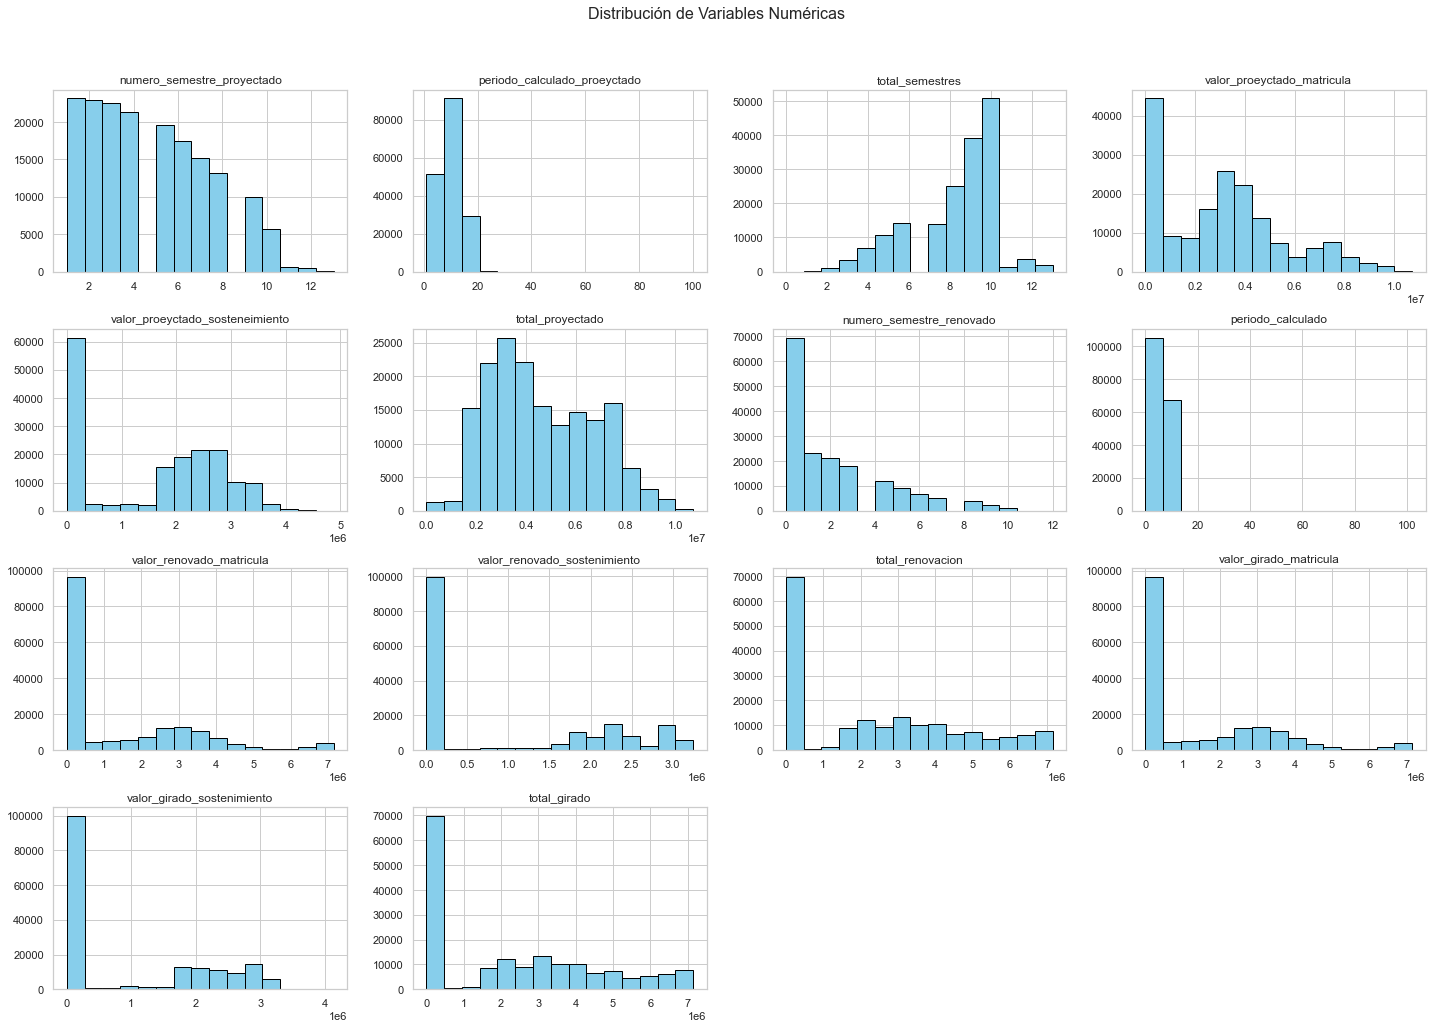

In [50]:
# Seleccionar solo columnas numéricas
df_num = df.select_dtypes(include=['float64', "int32", "int64"])

# Configurar estilo
sns.set(style="whitegrid")

# Crear histogramas para cada columna numérica
df_num.hist(bins=15, figsize=(20, 15), color='skyblue', edgecolor='black')

# Añadir un título general a la figura
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar la figura con los histogramas
plt.show()

### Interpretación de los gráficos

A partir del grafico se puede observar que:

-	Las variables valor_proyectado_matricula y valor_proyectado_sostenimiento, presentan la mayoría de los valores en rangos bajos, pero también tienen valores altos. Esto indica que hay variabilidad en los costos tanto de matrícula como de sostenimiento.
-	La variable total_proyectado, presenta una distribución que muestra que, aunque la mayoría proyecta costos bajos, existe un grupo con costos elevados, lo cual es importante para realizar proyecciones.
-	Las variables numero_semestre_proyectado y numero_semestre_renovado, indican la duración académica proyectada y renovada, con la mayoría de los valores entre 2-6 semestres, aunque algunos llegan a 12. Esto indica necesidades de tiempo adicionales para casos específicos, que se deberían tener en cuenta.
-	Las variables valor_renovado_matricula y valor_renovado_sostenimiento, reflejan los costos renovados de matrícula y sostenimiento, con una mayoría de valores bajos y algunos casos con valores altos.
-	total_girado: Representa el apoyo financiero total recibido. La mayoría de los estudiantes reciben montos bajos, mientras que algunos requieren apoyo considerable, lo cual puede estar relacionado con las condiciones socioeconómicas o el tipo de programa académico.

In [51]:
# Eliminar las filas del DataFrame que contienen valores nulos (faltantes).
df = df.dropna()

# Mostrar información resumida del DataFrame después de eliminar las filas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172210 entries, 481507 to 4706287
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               172210 non-null  object 
 1   id_usuario                       172210 non-null  object 
 2   operador_logistico               172210 non-null  object 
 3   id_fondo                         172210 non-null  object 
 4   numero_semestre_proyectado       172210 non-null  int64  
 5   periodo_calculado_proeyctado     172210 non-null  int64  
 6   tipo_modalidad                   172210 non-null  object 
 7   total_semestres                  172210 non-null  int64  
 8   valor_proeyctado_matricula       172210 non-null  int64  
 9   valor_proeyctado_sosteneimiento  172210 non-null  float64
 10  total_proyectado                 172210 non-null  float64
 11  id_renovacionusuario             172210 non-null  object 
 

In [52]:
# verificacion de completitud de los datos
for col in df.columns:
    print (col, np.sum(pd.isnull(df[col])))     # Iterar sobre cada columna y contar el número de valores nulos (faltantes).

id 0
id_usuario 0
operador_logistico 0
id_fondo 0
numero_semestre_proyectado 0
periodo_calculado_proeyctado 0
tipo_modalidad 0
total_semestres 0
valor_proeyctado_matricula 0
valor_proeyctado_sosteneimiento 0
total_proyectado 0
id_renovacionusuario 0
numero_semestre_renovado 0
periodo_calculado 0
valor_renovado_matricula 0
valor_renovado_sostenimiento 0
total_renovacion 0
valor_girado_matricula 0
valor_girado_sostenimiento 0
total_girado 0
estado_credito 0
id_estado_credito 0
CONVOCATORIA 0
FONDO SAPIENCIA 0
GENERO 0
ESTRATO 0
COMUNA DE RESIDENCIA 0
IES 0
PROGRAMA 0


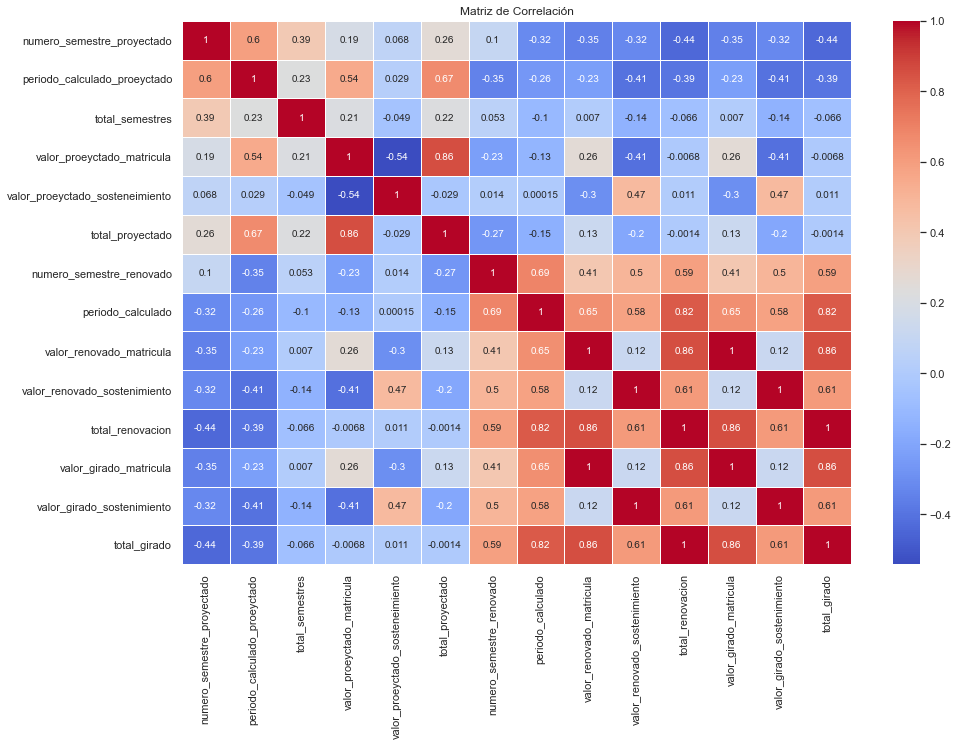

In [53]:
# Crear matriz de correlación
corr_matrix = df_num.corr()

# Crear el heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Intrepretación

A partir de la matriz se pudieron identificar variables con valores altos de correlación, como se indican a continuación:

•	Las variables __total_renovacion__ y __total_girado__ tienen una correlación de 1.0, lo que indica que el valor de renovación coincide exactamente con el valor girado. Esto indica que ambas columnas representan la misma variable en el conjunto de datos, por lo que sería conveniente considerar la eliminación de una de las variables.  

•	Las variables __valor_proyectado_matricula__ y __valor_renovado_matricula__ presentan una correlación de 0.86. De igual manera, las variables __valor_renovado_matricula__ y valor_girado_matricula muestran el mismo valor de correlación, indicando una fuerte relación entre ellas. Sin embargo, dado que la correlación no es perfecta, no se justifica la eliminación de ninguna de estas variables, ya que cada una podría aportar información única sobre diferentes etapas del proceso financiero.  

•	La correlación negativa de -0.54 entre __valor_proyectado_matricula__ y __valor_proyectado_sostenimiento__, esto podría indicar que, en los escenarios proyectados, un mayor ingreso esperado por matrícula reduce la necesidad de recursos adicionales para el sostenimiento.

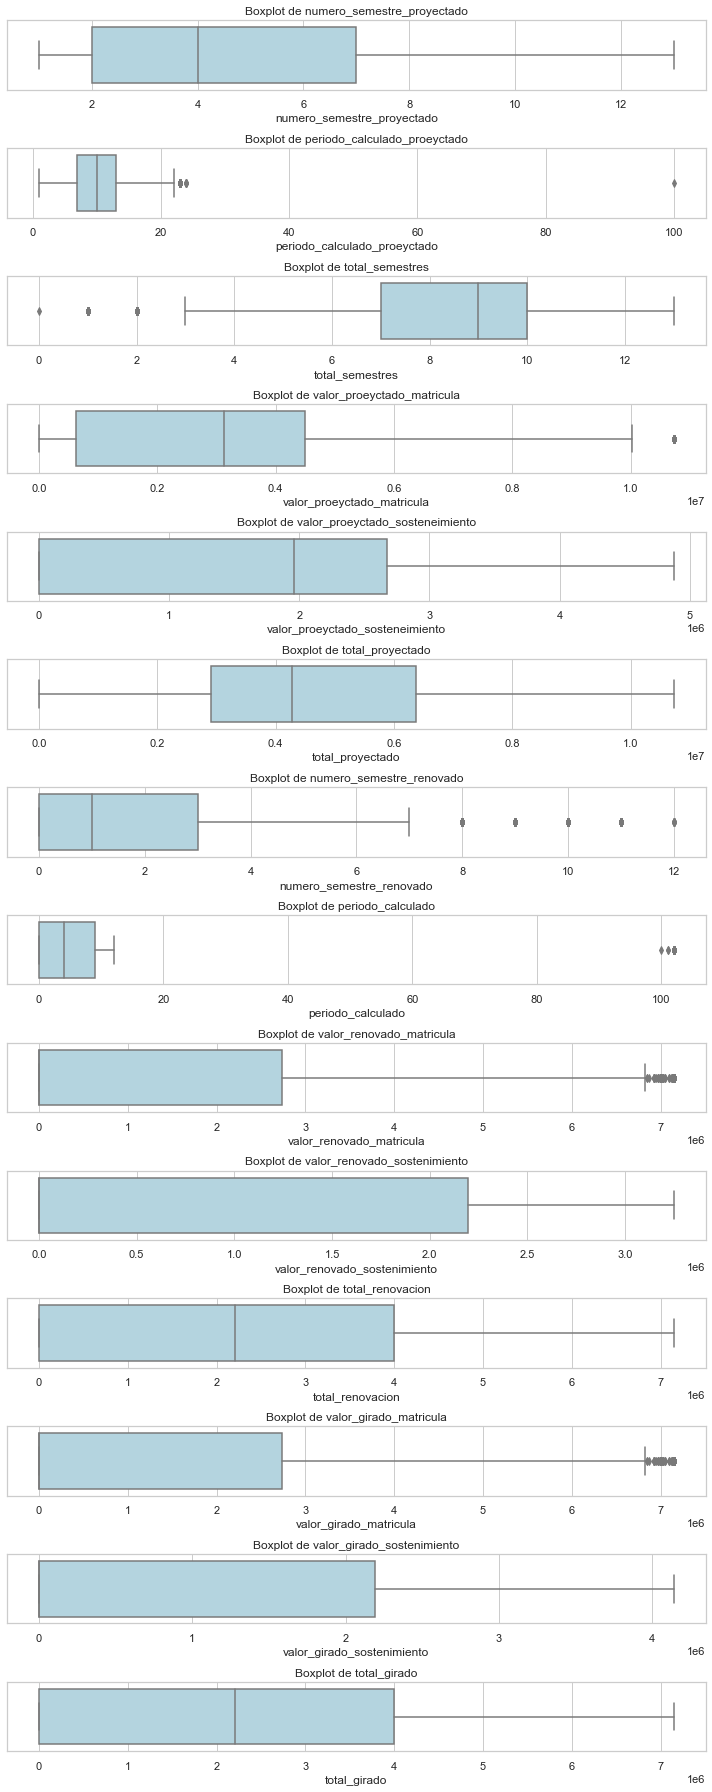

In [54]:
# Crear boxplots para cada variable numérica
fig, axes = plt.subplots(len(df_num.columns), 1, figsize=(10, 25))
for i, col in enumerate(df_num.columns):
    sns.boxplot(data=df, x=col, ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

### Intrepretación

Se pueden observar valores atípicos en algunas de las variables, como se detalla a continuación:

•	periodo_calculado_proyectado: La mayoría de los valores están entre 0 y 20, pero algunos casos alcanzan casi 100, indicando periodos proyectados mucho más largos en ciertos casos.  

•	numero_semestre_renovado: Valores principalmente entre 0 y 4, pero algunos alcanzan hasta 12, mostrando estudiantes con renovaciones adicionales de semestres.  

•	valor_girado_matricula: La mayoría está en el rango de 0 a 3 millones, pero los valores atípicos llegan hasta 7 millones, posiblemente debido a matrículas altas en ciertas instituciones.  

•	valor_renovado_matricula: La mayoría de los valores están entre 0 y 2 millones, pero alcanzan hasta 5 millones en algunos casos, reflejando renovaciones en programas de alto costo.  

•	total_renovacion: Valores típicos de 0 a 2 millones, con valores atípicos altos, indicando casos que requieren mayor monto de renovación.

•	total_girado: La mayoría entre 0 y 2 millones, pero algunos giros son significativamente más altos, reflejando programas o situaciones específicas.  

•	valor_renovado_sostenimiento: La mayoría de los valores entre 0 y 2 millones, con valores atípicos hasta 2.5 millones, indicando necesidades especiales de sostenimiento.   

•	valor_proyectado_sostenimiento: La mayoría entre 0 y 2 millones, pero algunos valores proyectados alcanzan 4 millones, indicando costos de vida elevados.   

•	total_proyectado: Valores típicos entre 0 y 0.5 millones, con algunos valores atípicos en la parte superior, sugiriendo altos costos proyectados en ciertos casos.    

•	valor_proyectado_matricula: Valores entre 0 y 0.4 millones, con ligeros valores más altos hacia 0.8 millones, reflejando programas con matrículas costosas.   

•	total_semestres: La mayoría en el rango de 0 a 8, pero algunos valores alcanzan hasta 11, sugiriendo programas más largos.  

•	periodo_calculado: Similar a periodo_calculado_proyectado, con valores entre 0 y 20 pero algunos llegando a 100.    

•	numero_semestre_proyectado: La mayoría entre 2 y 6, con valores atípicos hasta 12, mostrando algunos programas con semestres proyectados más largos.

Se observa como las variables "valor_renovado_matricula", "valor_renovado_sostenimiento" y "total_renovacion", tienen los mismos valores con respecto a las variables "valor_girado_matricula", "valor_girado_sostenimiento" y "total_girado". Por ende, se eliminaran del modelo las que conciernen a los valores renovados de la siguiente manera:

In [65]:
df = df.drop(columns=[
    "valor_renovado_matricula",
    "valor_renovado_sostenimiento",
    "total_renovacion"
])

In [66]:
df.columns

Index(['id', 'id_usuario', 'operador_logistico', 'id_fondo',
       'numero_semestre_proyectado', 'periodo_calculado_proeyctado',
       'tipo_modalidad', 'total_semestres', 'valor_proeyctado_matricula',
       'valor_proeyctado_sosteneimiento', 'total_proyectado',
       'id_renovacionusuario', 'numero_semestre_renovado', 'periodo_calculado',
       'valor_girado_matricula', 'valor_girado_sostenimiento', 'total_girado',
       'estado_credito', 'id_estado_credito', 'CONVOCATORIA',
       'FONDO SAPIENCIA', 'GENERO', 'ESTRATO', 'COMUNA DE RESIDENCIA', 'IES',
       'PROGRAMA'],
      dtype='object')

In [57]:
df.dtypes

id                                  object
id_usuario                          object
operador_logistico                  object
id_fondo                            object
numero_semestre_proyectado           int64
periodo_calculado_proeyctado         int64
tipo_modalidad                      object
total_semestres                      int64
valor_proeyctado_matricula           int64
valor_proeyctado_sosteneimiento    float64
total_proyectado                   float64
id_renovacionusuario                object
numero_semestre_renovado           float64
periodo_calculado                  float64
valor_renovado_matricula             int64
valor_renovado_sostenimiento         int64
total_renovacion                     int64
valor_girado_matricula               int64
valor_girado_sostenimiento           int64
total_girado                         int64
estado_credito                      object
id_estado_credito                   object
CONVOCATORIA                        object
FONDO SAPIE

### Análisis variables categóricas

In [58]:
def crear_visualizaciones_categoricas(df, categorical_vars, 
                                    title_size=14,      # Tamaño de títulos de cada gráfico
                                    label_size=12,      # Tamaño de etiquetas de categorías
                                    value_size=11,      # Tamaño de valores en las barras
                                    axis_label_size=12  # Tamaño de etiquetas de ejes
                                   ):
    """
    Crea visualizaciones para variables categóricas con tamaños de fuente personalizables
    
    Args:
        df: DataFrame con los datos
        categorical_vars: Lista de variables categóricas a visualizar
        title_size: Tamaño de fuente para títulos
        label_size: Tamaño de fuente para etiquetas de categorías
        value_size: Tamaño de fuente para valores en las barras
        axis_label_size: Tamaño de fuente para etiquetas de ejes
    """
    # Configurar el estilo
    plt.style.use('seaborn')
    
    # Calcular el número de filas necesarias (2 gráficos por fila)
    n_rows = (len(categorical_vars) + 1) // 2
    
    # Crear la figura con subplots - Aumentado el tamaño vertical para acomodar fuentes más grandes
    fig, axes = plt.subplots(n_rows, 2, figsize=(20, 9*n_rows))
    fig.suptitle('Distribución de Variables Categóricas', fontsize=title_size+4, y=1.02)
    
    # Aplanar el array de axes para facilitar la iteración
    axes = axes.ravel()
    
    # Colores personalizados
    colors = sns.color_palette('husl', 8)
    
    for idx, var in enumerate(categorical_vars):
        # Calcular las frecuencias
        value_counts = df[var].value_counts()
        
        # Crear el gráfico de barras
        sns.barplot(x=value_counts.values, 
                   y=value_counts.index, 
                   ax=axes[idx],
                   palette=colors)
        
        # Personalizar el gráfico
        axes[idx].set_title(f'Distribución de {var}', pad=20, fontsize=title_size)
        axes[idx].set_xlabel('Cantidad', fontsize=axis_label_size)
        axes[idx].set_ylabel('')
        
        # Aumentar tamaño de fuente de las etiquetas del eje Y (categorías)
        axes[idx].tick_params(axis='y', labelsize=label_size)
        # Aumentar tamaño de fuente de las etiquetas del eje X (valores)
        axes[idx].tick_params(axis='x', labelsize=label_size)
        
        # Añadir valores en las barras con fuente más grande
        for i, v in enumerate(value_counts.values):
            axes[idx].text(v, i, f' {v}', va='center', fontsize=value_size)
            
        # Ajustar los márgenes
        axes[idx].margins(x=0.2)
        
    # Eliminar subplots vacíos si el número de variables es impar
    if len(categorical_vars) % 2 != 0:
        axes[-1].remove()
    
    # Ajustar el layout con más espacio entre subplots
    plt.tight_layout(h_pad=0.5, w_pad=0.5)
    
    return fig

<ipython-input-58-b192568c9aaf>:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
) missing from current font.af>:66: UserWarning: Glyph 13 (
  plt.tight_layout(h_pad=0.5, w_pad=0.5)
) missing from current font.ib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


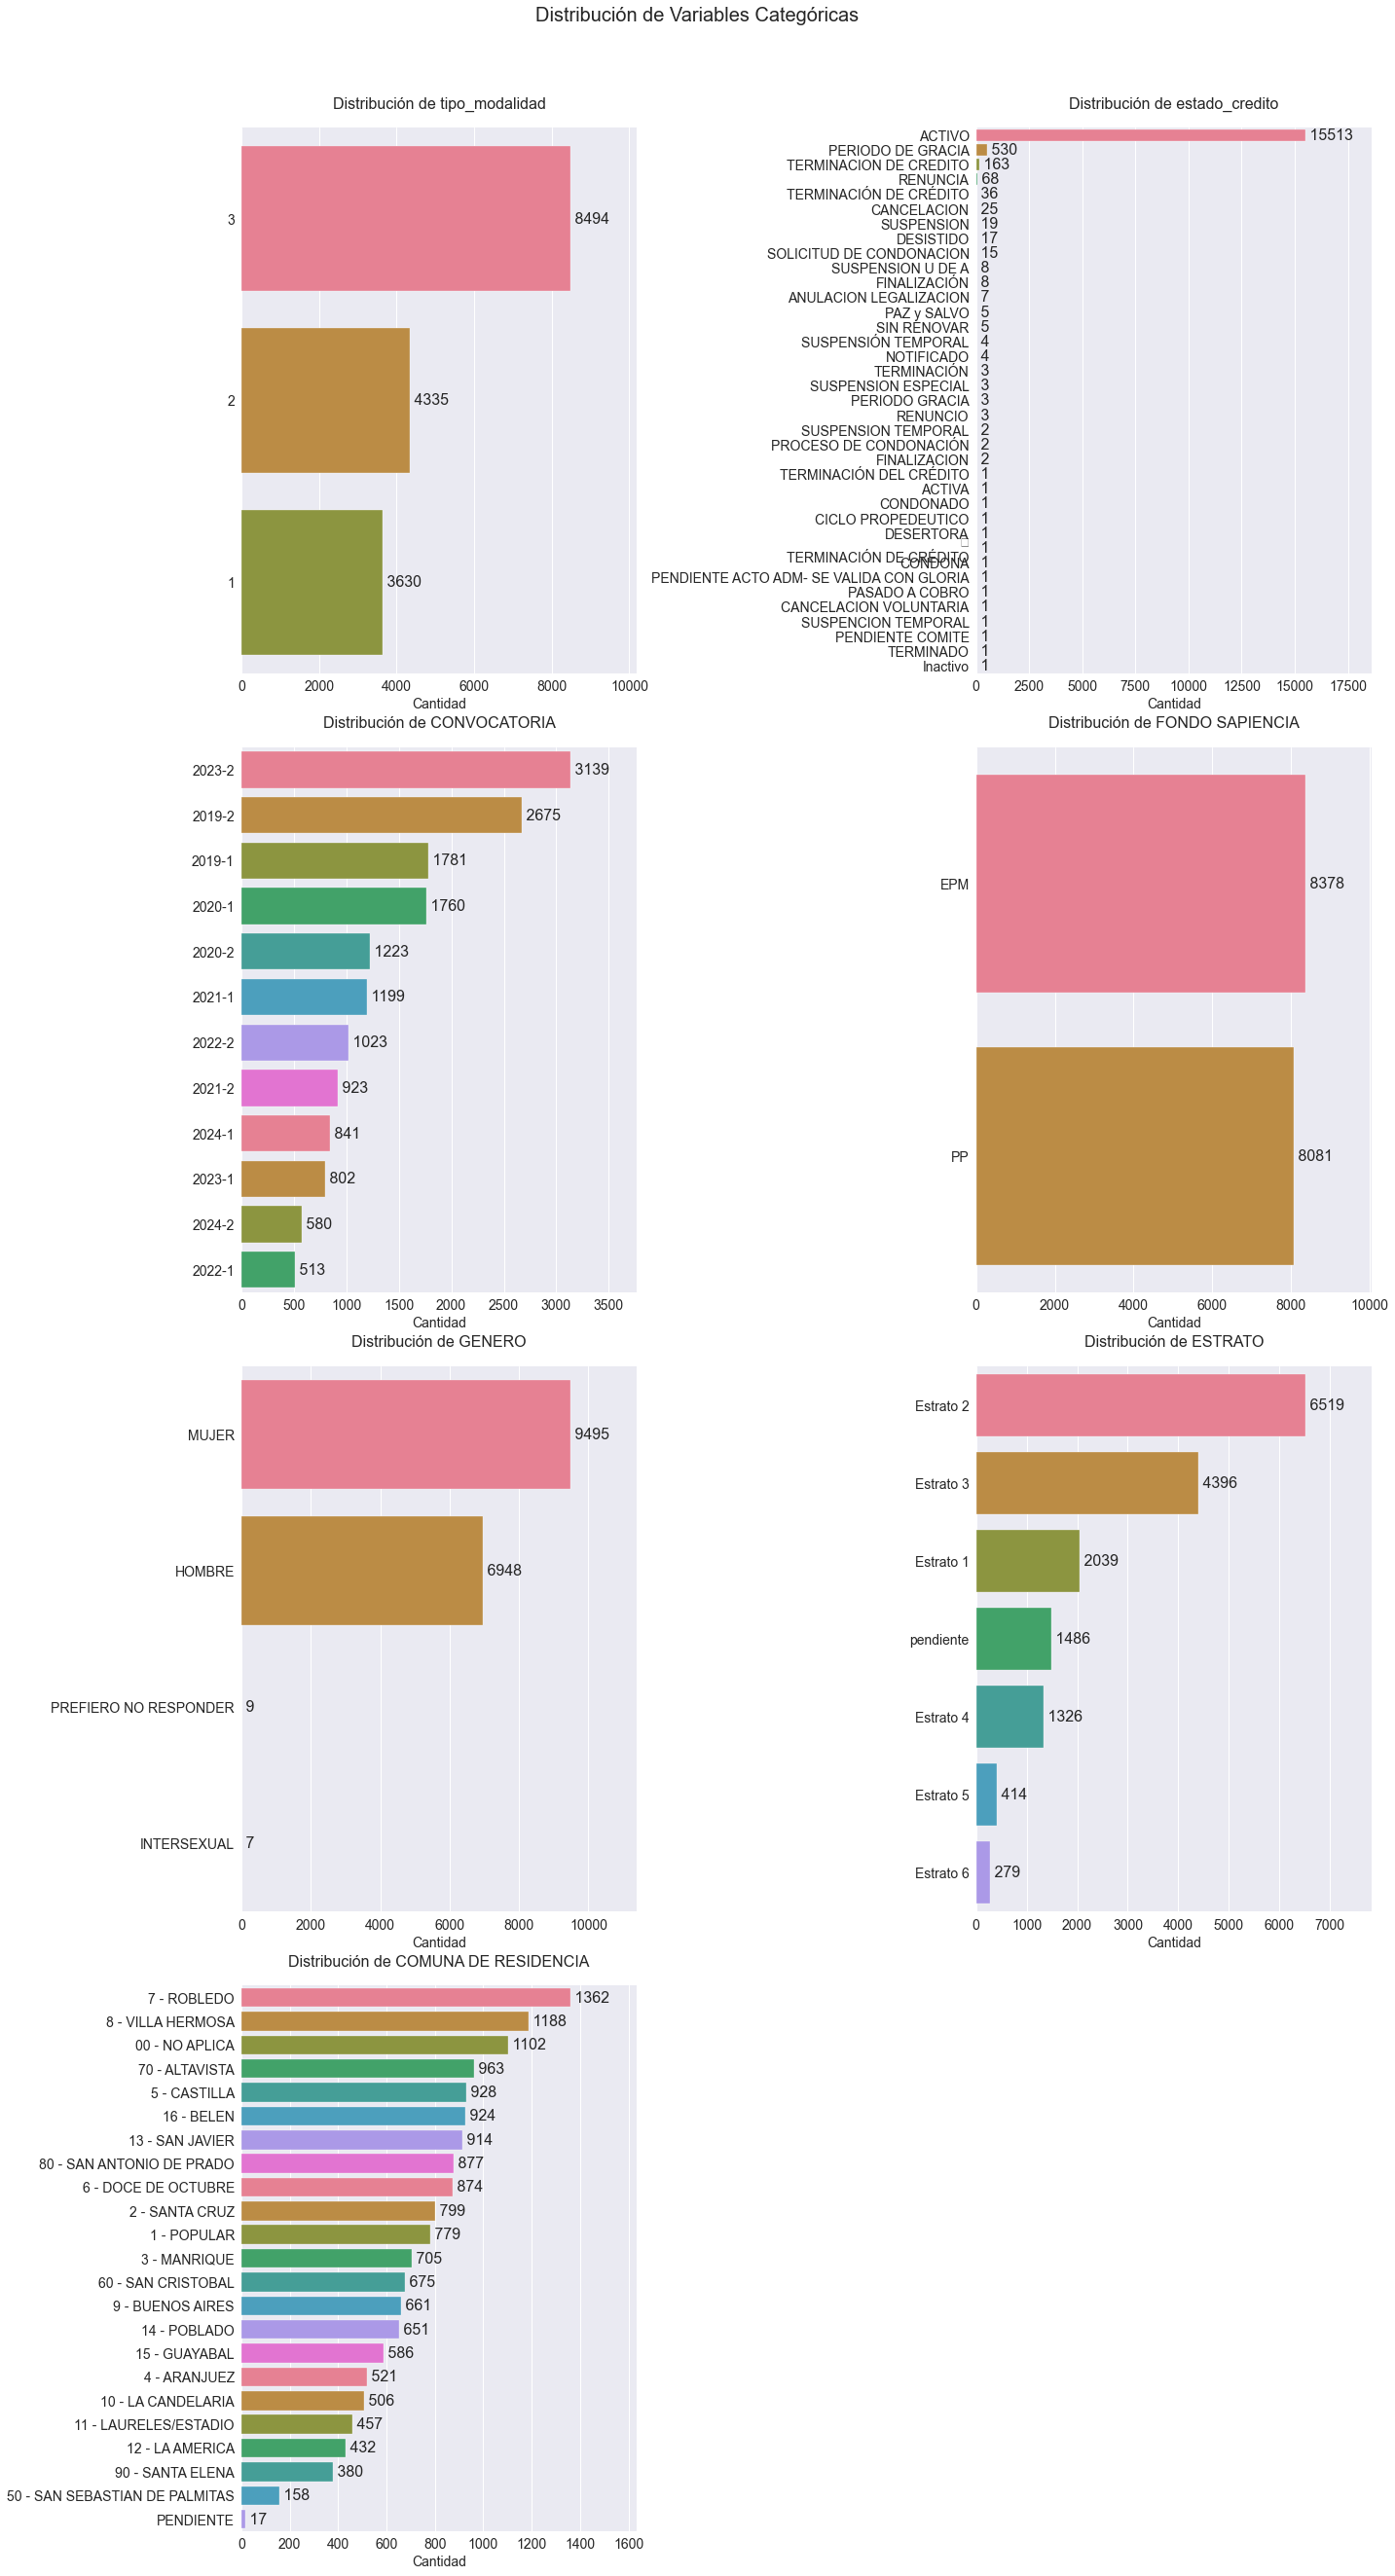

In [59]:
# Puedes personalizar los tamaños de fuente al llamar la función:
# Para usar esta función:
df_grafico_categoricas = df.drop_duplicates(subset="id", keep="last")
categorical_vars = ['tipo_modalidad', 'estado_credito', 
                   'CONVOCATORIA', 'FONDO SAPIENCIA', 'GENERO', 'ESTRATO', 
                   'COMUNA DE RESIDENCIA']
fig = crear_visualizaciones_categoricas(df_grafico_categoricas, 
                                      categorical_vars,
                                      title_size=16,      # Títulos más grandes
                                      label_size=14,      # Etiquetas de categorías más grandes
                                      value_size=16,      # Valores en las barras más grandes
                                      axis_label_size=14  # Etiquetas de ejes más grandes
                                     )
plt.show()

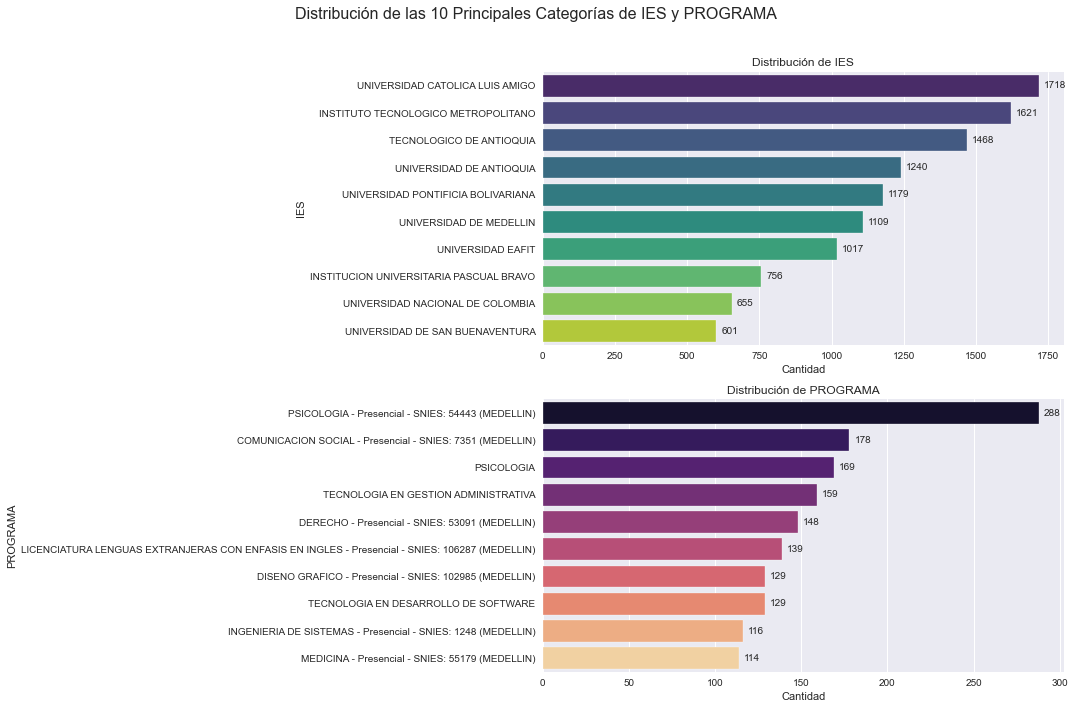

In [60]:
# Verificar las 10 principales categorías de "IES" y "PROGRAMA"
top_10_ies = df_grafico_categoricas['IES'].value_counts().nlargest(10)
top_10_programa = df_grafico_categoricas['PROGRAMA'].value_counts().nlargest(10)

# Crear el gráfico
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharey=False)
fig.suptitle("Distribución de las 10 Principales Categorías de IES y PROGRAMA", fontsize=16)

# Gráfico para la variable "IES"
sns.barplot(y=top_10_ies.index, x=top_10_ies.values, ax=axes[0], palette="viridis")
axes[0].set_title("Distribución de IES")
axes[0].set_xlabel("Cantidad")
axes[0].set_ylabel("IES")

# Añadir valores encima de cada barra para "IES"
for i, value in enumerate(top_10_ies.values):
    axes[0].annotate(f"{value}", xy=(value, i), xytext=(5, 0),
                     textcoords="offset points", ha="left", va="center", fontsize=10)

# Gráfico para la variable "PROGRAMA"
sns.barplot(y=top_10_programa.index, x=top_10_programa.values, ax=axes[1], palette="magma")
axes[1].set_title("Distribución de PROGRAMA")
axes[1].set_xlabel("Cantidad")
axes[1].set_ylabel("PROGRAMA")

# Añadir valores encima de cada barra para "PROGRAMA"
for i, value in enumerate(top_10_programa.values):
    axes[1].annotate(f"{value}", xy=(value, i), xytext=(5, 0),
                     textcoords="offset points", ha="left", va="center", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

### Intrepretación de los gráficos descriptivos

- La variable __tipo_modalidad__, la cual representa la modalidad de financiación escogida por el beneficiario, donde 1 corresponde a la modalidad de Matricula, 2 a la de Sostenimiento y 3 Matricula y sostenimiento. Se observa como, la mayoría de los beneficios prefieren la modalidad 3, en total son, 8494 beneficiarios. MIentras que casi la mitad, 4335 prefieren la modalidad de Matricula. Por otro lado, 3630 prefieren la modalidad de sostenimiento.

- La variable __estado_credito__, muestra el estado actual del beneficiario con la entidad Sapiencia. Se observa como la inmensa mayoría, 15513 beneficiarios, se encuentran en estado activo su crédito. Los otros estados corresponde a etapas de culminación, condonación y/o cobro del crédito.

- La variable __CONVOCATORIA__, corresponde con el semestre en el que el beneficiario legalizó su crédito. En este caso se observa como, actualmente, la convocatoria en la que se legalizaron más beneficiarios fue en el 2023-2 con 3139 estudiantes, seguida por la convocatoria 2019-2 con 2675 estudiantes legalizados.

- La variable __FONDO SAPIENCIA__, muestra las dos fuentes de financiación mediante la cual los beneficiarios reciben los estímulos a lo largo de su ciclo en la agencia. Se observa como la mayoría de beneficiarios, 8378 son del fondo EPM. Mientras que, 8081 son el fondo PP.

- La variable __GENERO__, representa el género por el cual se identificaron los beneficiarios a la hora de legalizar su crédito. Se observa una gran diferencia entre hombres y mujeres que gozan de los beneficios ofrecidos por Sapiencia. Donde 9495 son mujeres mientras que 6948 son hombres, 7 son de género intersexual y 9 prefieren no responder. Esto refleja una representación femenina significativa en los créditos educativos condonables, lo cual podría estar relacionado con la demanda educativa o la estructura demográfica de la población estudiantil.

- La variable __ESTRATO__, representa el estrato socioeconómico del beneficiario. Donde la mayoría de beneficiarios son de los estratos 2 y 3 con un total de 6519 y 4396 respectivamente.

- La variable __COMUNA DE RESIDENCIA__, representa la comuna en la cual reside el beneficiario. Entre las comunas con más beneficiarios se encuentran 7 - ROBLEDO con 1362, 8- VILLA HERMOSA con 1188 y 70 - ALTAVISTA con 963.

- La variable __IES__, representa la institución de educación superior en la cual estudian los beneficiarios. Se observa como las universidades que más beneficiarios de los fondos Sapiencia son  la UNIVERSIDAD CATOLICA LUIS AMIGO co 1718 estudiantes, el INSTITUTO TECNOLOGICO METROPOLITANO (ITM) con 1621, el TECNOLOGICO  DE ANTIOQUIA (TDA) con 1486 y la UNIVERSIDAD DE ANTIOQUIA con 1240 beneficiarios.

- La variable __PROGRAMA__, representa el nombre del programa que está estudiando el beneficiario. Se observa como, los programas que suelen ser más estudiados por los beneficiarios son PSICOLOGIA con 469 y COMUNICACION SOCIAL con 178 beneficiarios respectivamente.

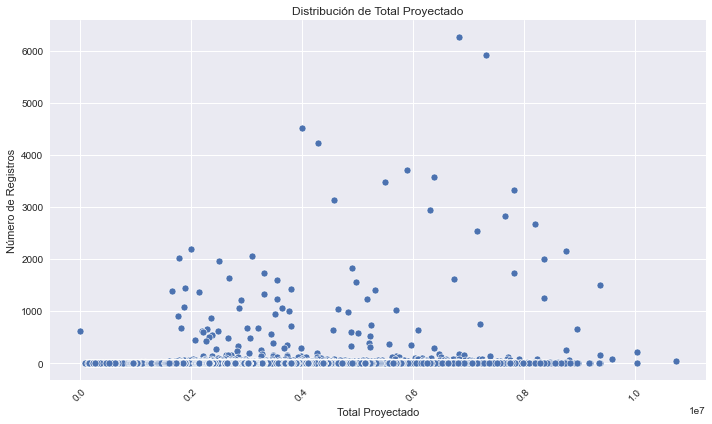

In [67]:
total_counts = df.groupby('total_proyectado')['total_proyectado'].count().sort_values(ascending=False)

# Crear el gráfico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(x=total_counts.index, y=total_counts.values, palette="viridis")

# Personalizar el gráfico
plt.title('Distribución de Total Proyectado')
plt.xlabel('Total Proyectado')
plt.ylabel('Número de Registros')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Del gráfico de dispersion se puede observar lo siguiente:

- vLa mayoría de los puntos se encuentran concentrados en valores de __total_proyectado__ cercanos al cero. Esto indica que la mayoría de los registros tienen valores bajos de __total_proyectado__.
- La dispersión es menor en la parte baja del eje horizontal (valores más pequeños de __total_proyectado__), lo cual sugiere que es común tener registros con montos proyectados relativamente bajos.
- A medida que el valor de __total_proyectado__ aumenta, la cantidad de beneficiarios con proyecciones financieras altas disminuye notablemente, lo que indica que hay pocos registros con valores altos.

## Variable de salida

La variable de salida utilizada fue el __total_proyectado__ ya que es la que presenta el monto financiero que se busca predecir basado  en ciertas caracteristicas de ínterés.

## Dividir el conjunto de datos en entrenamiento y prueba

Se procede a realizar separación del dataframe en dos dataset:

Se utilizará como conjunto de datos de entrenamiento los registros desde la convocatoria 2019-1 hasta la 2024-1, dejando como datos de prueba los registros cuya convocatoria sea 2024-2.

In [62]:
# Dividir el DataFrame en dos partes
df_train = df.loc[df["CONVOCATORIA"] != "2024-2"]    #Dataset de Trabajo
df_test = df.loc[df["CONVOCATORIA"] == "2024-2"]  #Dataser de prueba
print("Dimensión del dataset de entrenamiento: ", df_train.shape)
print("Dimensión del dataset de prueba: ", df_test.shape)

Dimensión del dataset de entrenamiento:  (167693, 29)
Dimensión del dataset de prueba:  (4517, 29)


### Exportación de los conjuntos de datos

Se exportan los conjuntos de datos generados anteriormente.

In [63]:
df_train.to_csv("df_train.csv", index=False, encoding="latin", sep=";")
df_test.to_csv("df_test.csv", index=False, encoding="latin", sep=";")
print("Los archivos se han exportado correctamente")

Los archivos se han exportado correctamente
